In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [2]:
# Load the dataset
data = pd.read_csv("C:/hddp/processed.cleveland.data", header=None)

# Replace '?' with NaN and drop rows with missing values
data = data.replace('?', np.nan).dropna()

# Convert all data to float
data = data.astype(float)

# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert target to binary: 0 = no disease, 1 = has disease
y = y.apply(lambda x: 0 if x == 0 else 1)

# Print the first few rows to understand the dataset
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [3]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (237, 13)
Testing data shape: (60, 13)


In [4]:
# Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy of each model
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")


Logistic Regression Accuracy: 0.8833333333333333
SVM Accuracy: 0.9
Random Forest Accuracy: 0.8833333333333333
XGBoost Accuracy: 0.8333333333333334


C:\Users\shrav\AppData\Local\Temp\ipykernel_12660\2058403333.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


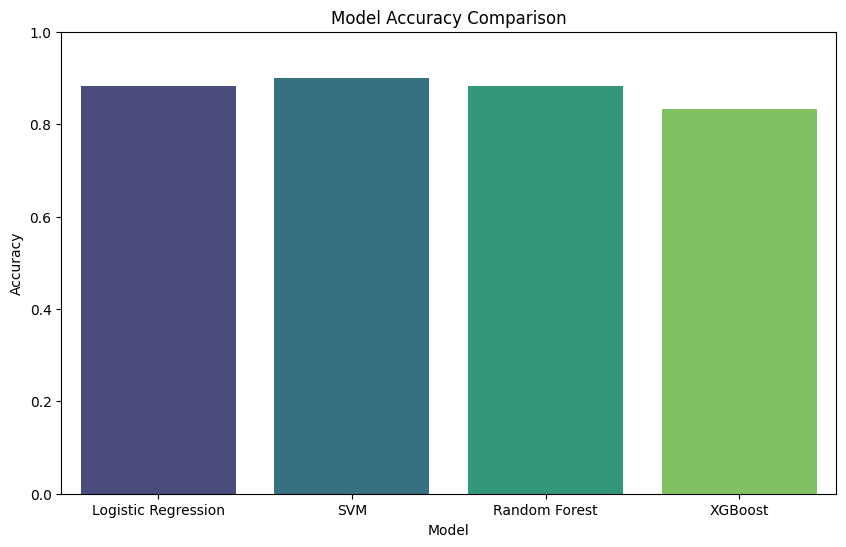

In [5]:
# Create a list of models and accuracies
models = ["Logistic Regression", "SVM", "Random Forest", "XGBoost"]
accuracies = [accuracy_logreg, accuracy_svm, accuracy_rf, accuracy_xgb]

# Plotting the model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression Confusion Matrix and Classification Report
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# SVM Confusion Matrix and Classification Report
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Random Forest Confusion Matrix and Classification Report
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost Confusion Matrix and Classification Report
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Confusion Matrix:
[[32  4]
 [ 3 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

SVM Confusion Matrix:
[[33  3]
 [ 3 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

Random Forest Confusion Matrix:
[[32  4]
 [ 3 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       

In [7]:
# Cell for Conclusion

# Print the accuracy of each model
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")

# Determine the best performing model
best_model = max(zip(models, accuracies), key=lambda x: x[1])

# Conclusion based on accuracy scores
print("\nConclusion:")
print(f"Based on the accuracy scores, {best_model[0]} is the best performing model for predicting heart disease with an accuracy of {best_model[1]:.2f}.")

# Additional insights based on confusion matrix and classification report (optional)
if best_model[0] == "SVM":
    print("\nSVM performed the best, but further tuning may be needed to improve precision and recall.")
elif best_model[0] == "Logistic Regression":
    print("\nLogistic Regression had a good performance, suitable for quick predictions but may need further optimization.")
elif best_model[0] == "Random Forest":
    print("\nRandom Forest gave a reasonable performance and is known for handling feature importance well.")
elif best_model[0] == "XGBoost":
    print("\nXGBoost performed slightly lower than the others but is still a good model, and tuning might improve results.")

# Displaying a brief summary of key performance metrics (precision, recall, f1-score)
print("\nModel performance metrics summary:")

# For each model, print precision, recall, f1-score (classification report already printed in the previous cell)
print(f"\nLogistic Regression:\n{classification_report(y_test, y_pred_logreg)}")
print(f"SVM:\n{classification_report(y_test, y_pred_svm)}")
print(f"Random Forest:\n{classification_report(y_test, y_pred_rf)}")
print(f"XGBoost:\n{classification_report(y_test, y_pred_xgb)}")


Logistic Regression Accuracy: 0.8833333333333333
SVM Accuracy: 0.9
Random Forest Accuracy: 0.8833333333333333
XGBoost Accuracy: 0.8333333333333334

Conclusion:
Based on the accuracy scores, SVM is the best performing model for predicting heart disease with an accuracy of 0.90.

SVM performed the best, but further tuning may be needed to improve precision and recall.

Model performance metrics summary:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

SVM:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90